# Linear regression

## Exercice 1

In [4]:
import pandas as pd
from bireport.definitions import *

/home/goamegah/Documents/workspace/develop/esgi/4a/s2/reporting/dataset


In [7]:
salary_df = pd.read_csv(f"{DATASET_DIR}/Salary.csv")
salary_df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


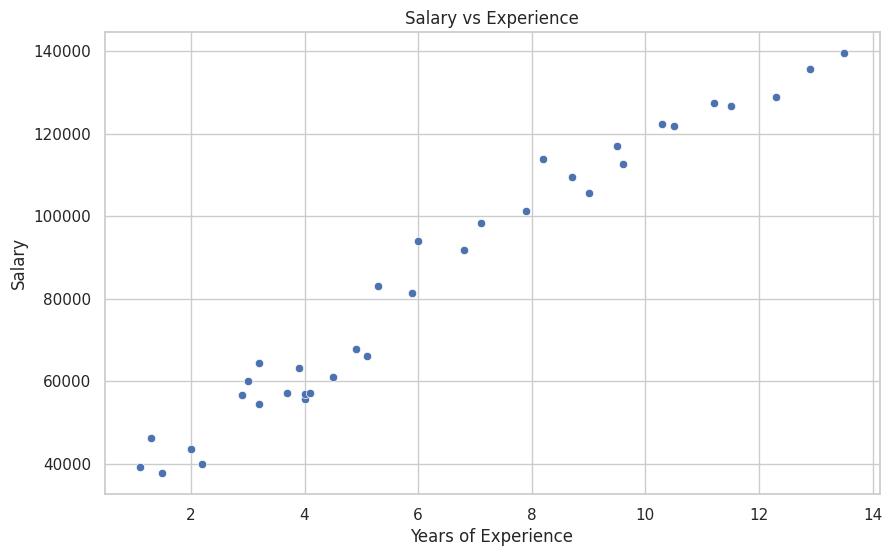

In [8]:
# plot the salary vs experience
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=salary_df, x="YearsExperience", y="Salary")
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


On observce que plus une personne a d’années d’expérience, plus son salaire a tendance à être élevé.

In [10]:
# Calculez la corrélation avec df.corr() et interprétez.
salary_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.982427
Salary,0.982427,1.000000


La corrélation entre l'expérience et le salaire est de 0.978, ce qui indique une forte corrélation positive. 
Cela signifie que plus l'expérience augmente, plus le salaire a tendance à augmenter.

Coefficient de détermination (R²): 0.8914
Le salaire prédit pour 10 ans d'expérience est : 114866.30


/home/goamegah/Documents/workspace/develop/esgi/4a/s2/reporting/bi_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


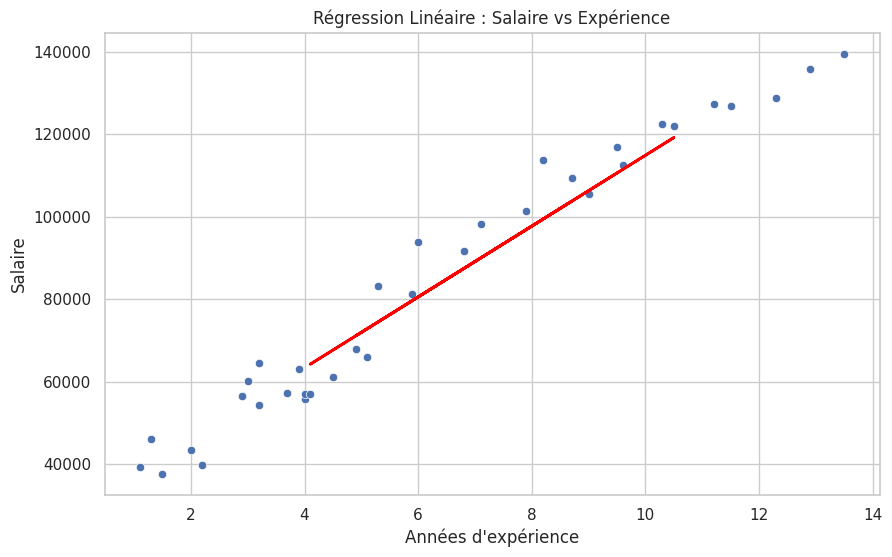

In [ ]:
# Entraînez votre modèle et déterminez le coefficient de détermination(R²) ?
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = salary_df[["YearsExperience"]]
y = salary_df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
r2 = model.score(X_test, y_test)

In [ ]:
print(f"Coefficient de détermination (R²): {r2:.4f}")
years_experience = 10
predicted_salary = model.predict([[years_experience]])
print(f"Le salaire prédit pour {years_experience} ans d'expérience est : {predicted_salary[0]:.2f}")

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=salary_df, x="YearsExperience", y="Salary")
plt.plot(X_test, model.predict(X_test), color='red', linewidth=2)
plt.title("Régression Linéaire : Salaire vs Expérience")
plt.xlabel("Années d'expérience")
plt.ylabel("Salaire")
plt.show()

Le coefficient de détermination R² est proche de 1 car il existe une forte relation linéaire entre les années d’expérience et le salaire. Cela signifie que le modèle explique bien la variance des salaires à partir de l’expérience. 

Toutefois, un R² élevé n’est pas toujours un gage de qualité : dans certains cas, il peut indiquer un surapprentissage, surtout si le modèle est trop complexe ou s’il s’ajuste trop précisément aux données d’entraînement. Il est donc important d’analyser le R² dans son contexte.

## Exercice 2 : Corrélation ≠ Causalité

### Étape 1 : Chargement des données

In [ ]:
import pandas as pd

df = pd.read_csv(f"{DATASET_DIR}/multiTimeline.csv", skiprows=2)
df.columns = ['Date', 'Diet', 'Gym']
df['Date'] = pd.to_datetime(df['Date'])

df.head()


,Date,Diet,Gym
0,2020-05-03,66,53
1,2020-05-10,63,56
2,2020-05-17,69,62
3,2020-05-24,67,56
4,2020-05-31,65,59


### Étape 2 : Visualisation et corrélation

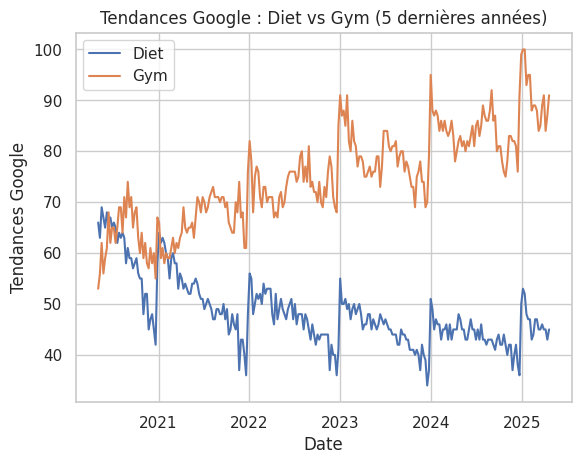

In [19]:
plt.plot(df['Date'], df['Diet'], label='Diet')
plt.plot(df['Date'], df['Gym'], label='Gym')
plt.title('Tendances Google : Diet vs Gym (5 dernières années)')
plt.xlabel('Date')
plt.ylabel('Tendances Google')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
correlation = df[['Diet', 'Gym']].corr()
print("Corrélation :")
print(correlation)

Corrélation :
          Diet       Gym
Diet  1.000000 -0.473699
Gym  -0.473699  1.000000


1. **La corrélation entre "Diet" et "Gym" prouve-t-elle une causalité ?**

Non, la corrélation négative observée (-0,47) ne signifie pas qu’il y a un lien de cause à effet entre les deux termes. Une corrélation indique simplement une relation statistique, mais ne permet pas de conclure que :
- Chercher "Diet" entraîne une baisse des recherches pour "Gym" (ou l’inverse),
- Ou qu’un autre facteur influence simultanément les deux.

Une corrélation négative suggère que lorsque l’un augmente, l’autre a tendance à diminuer, mais cela pourrait s’expliquer par d’autres raisons (ex : les gens se concentrent sur l’un ou l’autre, mais rarement les deux en même temps).

2. **Quels facteurs externes pourraient expliquer cette corrélation ?**

Plusieurs hypothèses sont possibles :

- Effet de substitution : Certaines personnes privilégient soit l'alimentation ("Diet"), soit le sport ("Gym"), mais pas les deux ensemble.
- Saisonnalité : Pics de recherches "Diet" après les fêtes (objectif perte de poids) et "Gym" en début d’année (bonnes résolutions).
- Différences culturelles : Dans certaines régions, "Diet" est plus populaire que "Gym", ou inversement.
- Influence marketing : Les publicités ciblent différemment ces termes, créant une compétition entre eux.

3. **Comment isoler ce facteur ?**
Pour mieux comprendre la relation, on pourrait :

- Analyser les données dans le temps : Observer si les tendances "Diet" et "Gym" sont cycliques (ex : "Diet" augmente en hiver, "Gym" au printemps).
- Segmenter l’audience : Étudier si la corrélation varie selon l’âge, le sexe ou la localisation géographique.
- Utiliser des modèles statistiques avancés : Une régression multiple permettrait de contrôler l’effet d’autres variables (ex : période de l’année, campagne publicitaire).
- Mener une étude expérimentale : Proposer aléatoirement des contenus liés à "Diet" ou "Gym" et mesurer l’impact sur l’autre terme.

## Exercice 3 : Régression linéaire 2

In [21]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseValue'] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Variable simple : MedInc
X_simple = df[['MedInc']]
y = df['MedHouseValue']

X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train, y_train)
y_pred_simple = model_simple.predict(X_test)

r2_simple = r2_score(y_test, y_pred_simple)
print("R² (régression simple) :", r2_simple)

R² (régression simple) : 0.45885918903846656


In [23]:
X_multi = df.drop(columns=['MedHouseValue'])

X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)

r2_multi = r2_score(y_test, y_pred_multi)
print("R² (régression multiple) :", r2_multi)

R² (régression multiple) : 0.5757877060324508


**Conclusion sur les R²**

R² simple (0.46) : Le revenu explique presque la moitié des prix, mais c’est insuffisant.

R² multiple (0.58) : Ajouter d’autres variables aide, mais 40% de la variation reste inexpliquée → Le modèle peut encore être amélioré.

**Pourquoi ne pas utiliser toutes les variables ?**

- Risque de surapprentissage (overfitting) : Trop de variables peuvent "mémoriser" le bruit plutôt que les vraies tendances.
- Variables inutiles ou redondantes : Certaines n’apportent rien (ex : une variable corrélée à une autre) et nuisent à la performance.
- Interprétabilité : Un modèle trop complexe devient difficile à expliquer.

